## Exercises

Task 0. Complete missing code.

In [3]:
!pip install praw

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Exercises

Task 0. Complete missing code.

Task 1. Use doc2vec instead of TF-IDF.

Task 2. Add SNE visualization (use Scikit-learn’s TSNE)

In [13]:
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id = '9V1OYrclIVCzr9zbVuxoGw',
    client_secret = '21gcrQpN0zZBYlUfj57EayU3MguPZw',
    user_agent = 'praw'
)

# Ця функція повертає DataFrame Pandas, що містить коментарі допису Reddit за його id
def getComments(id):
    submission = reddit.submission(id)
    pandas_list = []
    commentsList = submission.comments.list()
    # Параметр 'limit' можна збільшити, щоб розгорнути більше коментарів
    submission.comments.replace_more(limit=64)
    print(len(commentsList))
    i = 0
    for c in commentsList:
        if isinstance(c, praw.models.MoreComments):
            continue
        commentText = c.body
        if commentText in {'[deleted]', '[removed]'}:
            continue
        pandas_list.append([i, commentText])
        i+=1
    df = pd.DataFrame(pandas_list)
    df.columns = ['id', 'description']
    return df

In [14]:
# Читаємо коментарі Reddit і поміщаємо їх у DataFrame 
corpus = getComments('1detli')

print(corpus.shape)
corpus.head()

902
(452, 2)


,id,description
0,0,My father passed away last year. One item he ...
1,1,My mom told me this story the other day and it...
2,2,"When I was 15, my mother and I were standing i..."
3,3,Scariest moment of my life happened while my f...
4,4,I saw a 'shadow person' once.\n\nI didn't know...


In [15]:
print('First spooky story : ',corpus.loc[0,'description'])

First spooky story :  My father passed away last year.  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather.  For years he had this shotgun stashed in the attic.  After he passed, I had gone in the attic to look for it, only to find that it wasn't there.

A few months later, I had a dream in which I was talking to him and I asked him where he had put the shotgun.  He told me it was in the closet of a spare bedroom.  I called my mother and had her check, and sure enough that's where it was.

Now it's completely possible that my father had told me that when he was alive, and the dream was little more than a memory, but I certainly don't recall that being the case.


In [17]:
import re

# Попередня обробка
# Remove HTML elements
corpus['clean_description'] = corpus['description'].apply(lambda x: re.sub(r'<[^>]+>', '', x))

# Remove special characters and numbers
corpus['clean_description'] = corpus['clean_description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

print('Description cleaned of the first product:', corpus.loc[0, 'clean_description'])


Description cleaned of the first product: My father passed away last year  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  For years he had this shotgun stashed in the attic  After he passed I had gone in the attic to look for it only to find that it wasnt there

A few months later I had a dream in which I was talking to him and I asked him where he had put the shotgun  He told me it was in the closet of a spare bedroom  I called my mother and had her check and sure enough thats where it was

Now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but I certainly dont recall that being the case


In [19]:
# нижній регістр

corpus['clean_description'] = corpus['clean_description'].str.lower()

print('First story lower-cased : ',corpus.loc[0,'clean_description'])

First story lower-cased :  my father passed away last year  one item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  for years he had this shotgun stashed in the attic  after he passed i had gone in the attic to look for it only to find that it wasnt there

a few months later i had a dream in which i was talking to him and i asked him where he had put the shotgun  he told me it was in the closet of a spare bedroom  i called my mother and had her check and sure enough thats where it was

now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but i certainly dont recall that being the case


In [21]:
from nltk.tokenize import word_tokenize

# Токенізація очищеного опису

corpus['clean_tokens'] = corpus['clean_description'].apply(word_tokenize)

corpus.head()

,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[my, father, passed, away, last, year, one, it..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[my, mom, told, me, this, story, the, other, d..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[when, i, was, my, mother, and, i, were, stand..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, of, my, life, happened, whi..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[i, saw, a, shadow, person, once, i, didnt, kn..."


In [23]:
# Remove stop words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    lemmatized = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized.append(lemmatizer.lemmatize(word, pos))
    return [word for word in lemmatized if word.lower() not in stop_words]

corpus['clean_tokens'] = corpus['clean_tokens'].apply(lemmatize)
corpus.head()


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, tell, story, day, freak, fuck, old, sist..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scary, moment, life, happen, friend, camp, ea..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call..."


In [24]:
# Об’єднання токенів у один рядок

corpus["clean_document"] = corpus["clean_tokens"].apply(lambda x: ' '.join(x))
corpus.head()

,id,description,clean_description,clean_tokens,clean_document
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al...",father pass away last year one item always say...
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, tell, story, day, freak, fuck, old, sist...",mom tell story day freak fuck old sister littl...
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol...",mother stand kitchen talk rack wall hold key f...
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scary, moment, life, happen, friend, camp, ea...",scary moment life happen friend camp eastern c...
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call...",saw shadow person didnt know thats call much l...


### TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["clean_document"])

# X — генератор. Можна перетворити його на масив
X = X.toarray()
print(X.shape)

(452, 3928)


### LSA

In [26]:
from sklearn.decomposition import TruncatedSVD
# Навчання моделі SVD
svd_model = TruncatedSVD(n_components=12) # Тестуємо на 12 темах
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,0.204719,-0.058091,0.173845,0.011346,0.099745,0.023478,-0.010997,-0.085494,0.003246,-0.019224,0.031865,-0.048358,my father passed away last year one item he a...
1,0.252245,-0.026909,0.299494,-0.013553,-0.160642,0.005100,0.070633,-0.017801,-0.043618,-0.049764,0.062272,0.207727,my mom told me this story the other day and it...
2,0.178818,-0.017993,-0.027200,-0.115776,0.038473,0.024999,0.022662,-0.048850,-0.077136,-0.025281,-0.118186,0.064379,when i was my mother and i were standing in t...
3,0.278833,-0.079074,-0.103379,0.062532,-0.101171,0.009510,-0.001498,-0.108870,0.119749,0.290991,-0.208331,-0.129097,scariest moment of my life happened while my f...
4,0.386844,-0.000356,-0.121234,-0.015866,0.008697,-0.014008,0.013690,-0.056511,-0.068542,0.067769,-0.091673,-0.050202,i saw a shadow person once\n\ni didnt know tha...


In [27]:
import numpy as np

def extract_main_topics(x):
    """
    Повертає основну тему для кожного документа. Основна тема — та, що має максимальне значення для кожного рядка.
    """

    main_topic = np.argmax(x.values)
    
    return main_topic

# Ініціалізація стовпця main_topics значенням 0
topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:,:-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,0.204719,-0.058091,0.173845,0.011346,0.099745,0.023478,-0.010997,-0.085494,0.003246,-0.019224,0.031865,-0.048358,my father passed away last year one item he a...,0
1,0.252245,-0.026909,0.299494,-0.013553,-0.160642,0.005100,0.070633,-0.017801,-0.043618,-0.049764,0.062272,0.207727,my mom told me this story the other day and it...,2
2,0.178818,-0.017993,-0.027200,-0.115776,0.038473,0.024999,0.022662,-0.048850,-0.077136,-0.025281,-0.118186,0.064379,when i was my mother and i were standing in t...,0
3,0.278833,-0.079074,-0.103379,0.062532,-0.101171,0.009510,-0.001498,-0.108870,0.119749,0.290991,-0.208331,-0.129097,scariest moment of my life happened while my f...,9
4,0.386844,-0.000356,-0.121234,-0.015866,0.008697,-0.014008,0.013690,-0.056511,-0.068542,0.067769,-0.091673,-0.050202,i saw a shadow person once\n\ni didnt know tha...,0


In [28]:
topic_encoded_df['main_topic'].value_counts()

main_topic
0     212
3      38
9      29
1      29
4      25
2      24
8      24
10     17
11     17
7      17
6      15
5       5
Name: count, dtype: int64

In [29]:
# Створення DataFrame, що містить опис кожної теми через слова в словнику
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Обчислення абсолютних значень коефіцієнтів
topics_description = topics_description.apply(np.abs, axis = 1)

# Кожне слово пов’язане з оцінкою релевантності для кожної теми
topics_description.head()

,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,youll,young,youre,youth,yukon,zag,zig,zimbabwe,zinc,zone
topic_0,0.000794,0.000700,0.006167,0.001987,0.002402,0.006892,0.002333,0.023438,0.001110,0.000816,...,0.005484,0.049224,0.028896,0.001625,0.003012,0.002218,0.002218,0.001220,0.001948,0.002840
topic_1,0.000879,0.001420,0.001759,0.001140,0.000862,0.034923,0.001586,0.007554,0.000622,0.000265,...,0.002903,0.024684,0.055181,0.000917,0.002192,0.002103,0.002103,0.000463,0.000043,0.001671
topic_2,0.000215,0.003112,0.002507,0.001347,0.002216,0.002524,0.006279,0.017427,0.000385,0.000920,...,0.002709,0.018654,0.004109,0.000017,0.000150,0.002149,0.002149,0.000605,0.002360,0.002703
topic_3,0.000603,0.004890,0.005227,0.003390,0.009196,0.001436,0.020918,0.017348,0.000044,0.000618,...,0.006218,0.030017,0.017262,0.001213,0.006969,0.000591,0.000591,0.000023,0.000336,0.001232
topic_4,0.003474,0.001646,0.008721,0.005439,0.003425,0.023923,0.012390,0.006176,0.001340,0.000356,...,0.002670,0.040573,0.112322,0.000993,0.003266,0.002158,0.002158,0.001562,0.000298,0.001454


In [32]:
# Цикл по кожній темі та виведення 5 найважливіших слів

for topic_idx, topic_words in topics_description.iterrows():
    # Get top 5 words for this topic
    top_words = topic_words.sort_values(ascending=False).head(5)
    
    print(f"\nTopic: {topic_idx}")
    print("Top 5 words:")
    for word, score in top_words.items():
        print(f"- {word} (score: {score:.4f})")


Topic: topic_0
Top 5 words:
- like (score: 0.1792)
- time (score: 0.1737)
- say (score: 0.1668)
- house (score: 0.1648)
- tell (score: 0.1447)

Topic: topic_1
Top 5 words:
- ghost (score: 0.8387)
- nice (score: 0.2114)
- thats (score: 0.1200)
- mean (score: 0.1048)
- asshole (score: 0.1012)

Topic: topic_2
Top 5 words:
- say (score: 0.3343)
- mom (score: 0.2762)
- door (score: 0.2412)
- die (score: 0.2013)
- grandma (score: 0.1868)

Topic: topic_3
Top 5 words:
- story (score: 0.3483)
- fuck (score: 0.2530)
- house (score: 0.2502)
- door (score: 0.2123)
- thats (score: 0.1941)

Topic: topic_4
Top 5 words:
- dream (score: 0.4384)
- fuck (score: 0.3171)
- happen (score: 0.3098)
- story (score: 0.2827)
- dude (score: 0.1622)

Topic: topic_5
Top 5 words:
- alien (score: 0.5936)
- im (score: 0.2636)
- dead (score: 0.2403)
- dude (score: 0.2164)
- time (score: 0.2019)

Topic: topic_6
Top 5 words:
- shit (score: 0.5116)
- love (score: 0.2288)
- grandma (score: 0.2140)
- thats (score: 0.1997)


In [33]:
import wordcloud
import matplotlib.pyplot as plt

# Цикл по кожній темі та створення хмари слів із документів, пов’язаних із цією основною темою
wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    
    # Обробка тем, які не є основними для жодного документа в корпусі
    if (topic_encoded_df['main_topic']==t).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()

-------------------------

TOPIC  topic_0
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_1
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_2
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_3
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_4
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_5
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_6
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_7
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_8
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_9
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_10
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_11
cannot create wordcloud for this topic


Task 1. Use doc2vec instead of TF-IDF.


In [34]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess
import numpy as np

# 1. Підготовка даних для Doc2Vec
documents = [TaggedDocument(words=simple_preprocess(doc), tags=[str(i)]) 
             for i, doc in enumerate(corpus['clean_document'])]

# 2. Навчання моделі Doc2Vec
model = Doc2Vec(
    documents,
    vector_size=100,    # Розмір вектора документа
    window=5,          # Кількість слів по обидва боки для контексту
    min_count=2,       # Ігнорувати слова з частотою < 2
    workers=4,         # Кількість ядер процесора
    epochs=20,         # Кількість ітерацій навчання
    dm=1               # Алгоритм PV-DM (1) або PV-DBOW (0)
)

# 3. Отримання векторів документів
doc_vectors = np.array([model.dv[str(i)] for i in range(len(documents))])

# 4. Застосування LSA до векторів Doc2Vec
svd_model = TruncatedSVD(n_components=12)
lsa_doc2vec = svd_model.fit_transform(doc_vectors)

# 5. Аналіз тем (аналогічно до попереднього коду)
topic_encoded_df = pd.DataFrame(lsa_doc2vec, 
                               columns=["topic_" + str(i) for i in range(12)])

# Додавання оригінальних текстів
topic_encoded_df["documents"] = corpus['clean_description']

# Визначення основної теми для кожного документа
topic_encoded_df['main_topic'] = topic_encoded_df.iloc[:, :12].idxmax(axis=1)

# Аналіз результатів
print("Розподіл документів за темами:")
print(topic_encoded_df['main_topic'].value_counts())

Розподіл документів за темами:
main_topic
topic_0     443
topic_1       3
topic_10      1
topic_5       1
topic_3       1
topic_11      1
topic_7       1
topic_9       1
Name: count, dtype: int64



Task 2. Add SNE visualization (use Scikit-learn’s TSNE)

/Users/boykosvitlana/dl_venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


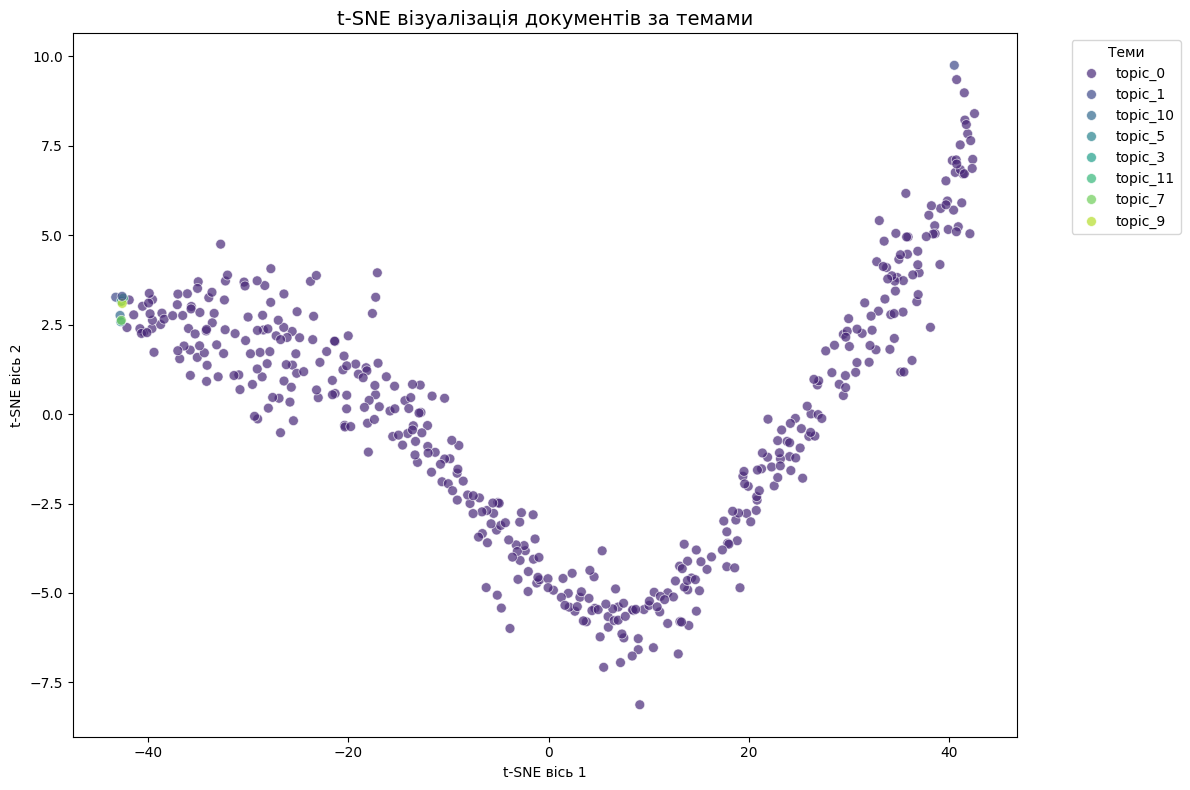

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Підготовка даних
X = doc_vectors  # Вектори документів з Doc2Vec
labels = topic_encoded_df['main_topic']  # Основні теми документів

# 2. Застосування t-SNE
tsne = TSNE(
    n_components=2,  # 2D візуалізація (можна змінити на 3 для 3D)
    perplexity=30,   # Оптимально для середніх датасетів
    random_state=42, # Для відтворюваності
    n_iter=1000      # Кількість ітерацій
)
X_tsne = tsne.fit_transform(X)

# 3. Візуалізація
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_tsne[:, 0], 
    y=X_tsne[:, 1],
    hue=labels,
    palette="viridis",
    alpha=0.7,
    s=50
)
plt.title('t-SNE візуалізація документів за темами', fontsize=14)
plt.xlabel('t-SNE вісь 1')
plt.ylabel('t-SNE вісь 2')
plt.legend(title='Теми', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()